In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

Importing the data

In [5]:
path_to_data = "csv_files/hmp_genus_and_lower_abundance.csv"
abundance_df = pd.read_csv(path_to_data)

We would like to a bit of exploratory data analysis on the data frame and maybe some clustering on the individual microbes.

In [7]:
abundance_cleaned = abundance_df.drop(columns = ['Unnamed: 0', "Unnamed: 0.1"])
abundance_cleaned.head()

,anterior_nares,buccal_mucosa,hard_palate,keratinized_gingiva,l_retroauricular_crease,mid_vagina,palatine_tonsils,posterior_fornix,r_antecubital_fossa,r_retroauricular_crease,saliva,stool,subgingival_plaque,supragingival_plaque,throat,tongue_dorsum,vaginal_introitus
0,5.308300e-07,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.000260,0.0,0.0,0.0,0.0,0.0
1,2.608696e-07,0.0,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.000234,0.0,0.0,0.0,0.0,0.0
2,2.608696e-07,0.0,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.000234,0.0,0.0,0.0,0.0,0.0
3,2.699605e-07,0.0,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.000027,0.0,0.0,0.0,0.0,0.0
4,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,0.0,0.0,0.0,0.0


First let's just describe the data then construct a plot of the sum of all the abundances across all sites

In [8]:
abundance_cleaned.describe()

,anterior_nares,buccal_mucosa,hard_palate,keratinized_gingiva,l_retroauricular_crease,mid_vagina,palatine_tonsils,posterior_fornix,r_antecubital_fossa,r_retroauricular_crease,saliva,stool,subgingival_plaque,supragingival_plaque,throat,tongue_dorsum,vaginal_introitus
count,2174.000000,2174.000000,2174.000000,2.174000e+03,2174.000000,2174.000000,2174.000000,2174.000000,2174.000000,2.174000e+03,2174.000000,2.174000e+03,2174.000000,2.174000e+03,2174.000000,2174.000000,2174.000000
mean,0.001341,0.001334,0.001346,1.330989e-03,0.001348,0.001372,0.001294,0.001375,0.001200,1.349835e-03,0.001316,1.348447e-03,0.001333,1.332977e-03,0.001294,0.001304,0.001374
std,0.014647,0.010819,0.012609,1.113655e-02,0.026637,0.025343,0.008049,0.023214,0.011762,2.462029e-02,0.009195,1.212319e-02,0.007099,8.564960e-03,0.007942,0.009295,0.024647
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.620253e-07,0.000000,1.481481e-08,0.000000,0.000000,0.000000
75%,0.000012,0.000036,0.000000,6.058824e-07,0.000001,0.000000,0.000012,0.000008,0.000000,8.500000e-07,0.000000,2.208856e-05,0.000012,2.275635e-05,0.000000,0.000006,0.000000
max,0.312745,0.234751,0.269631,2.387796e-01,0.711047,0.824369,0.194979,0.806340,0.247911,6.758538e-01,0.179377,4.763741e-01,0.115926,1.584939e-01,0.145764,0.145174,0.810766


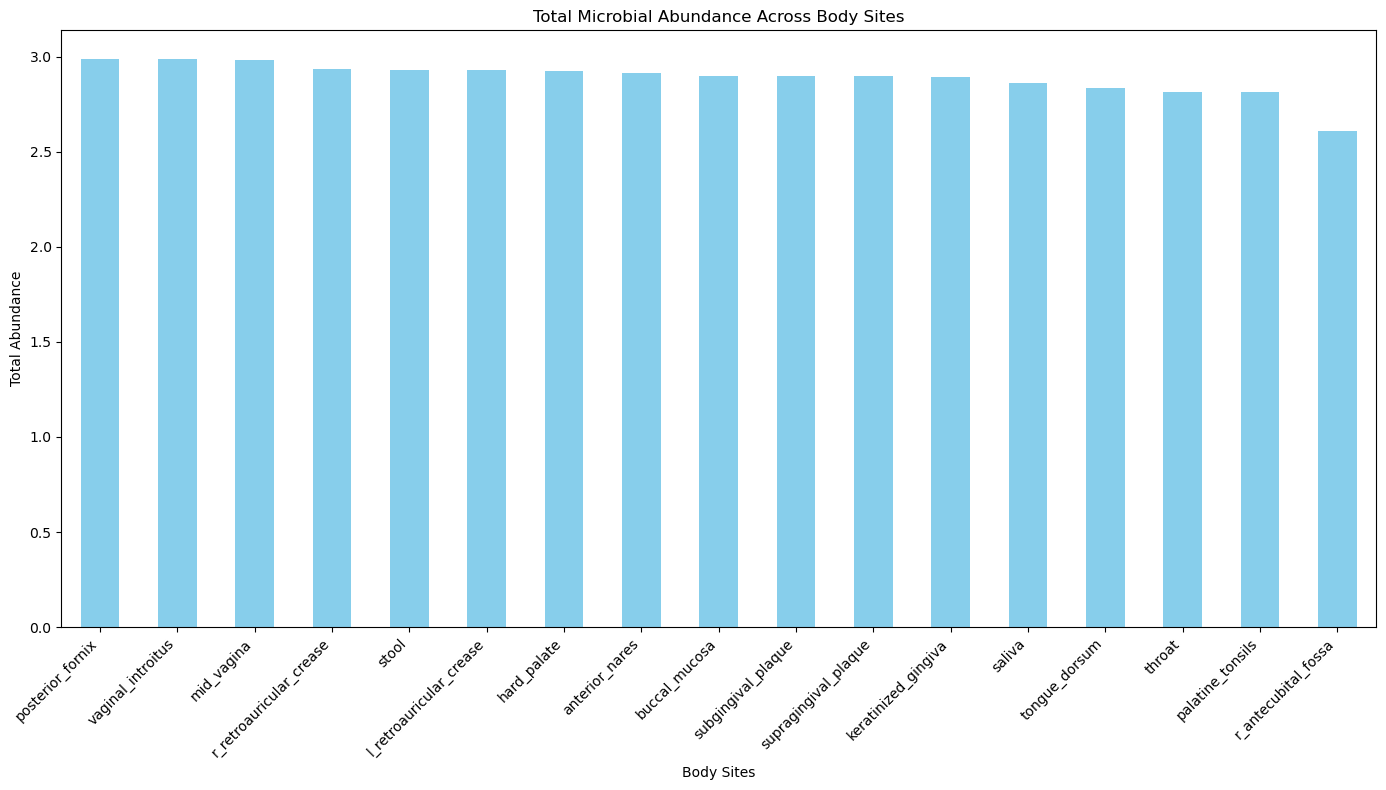

In [9]:
total_abundance = abundance_cleaned.sum() 
sorted_abund = total_abundance.sort_values(ascending = False)


plt.figure(figsize = (14,8))
sorted_abund.plot(kind = 'bar', color = 'skyblue')
plt.title("Total Microbial Abundance Across Body Sites")
plt.xlabel("Body Sites")
plt.ylabel("Total Abundance")
plt.xticks(rotation = 45, ha= 'right')
plt.tight_layout() 
plt.show()

Now let's plot some histograms to for the top 5 microbes. 

In [13]:
micr_total_ab = abundance_cleaned.sum(axis = 1)
microbes = abundance_df["Unnamed: 0"]
microbe_abundance = pd.DataFrame({"Microbe":microbes, "Total Abundances":micr_total_ab})
sort_microbe = microbe_abundance.sort_values(by = "Total Abundances", ascending = False)
top_microbes = sort_microbe.head(5)


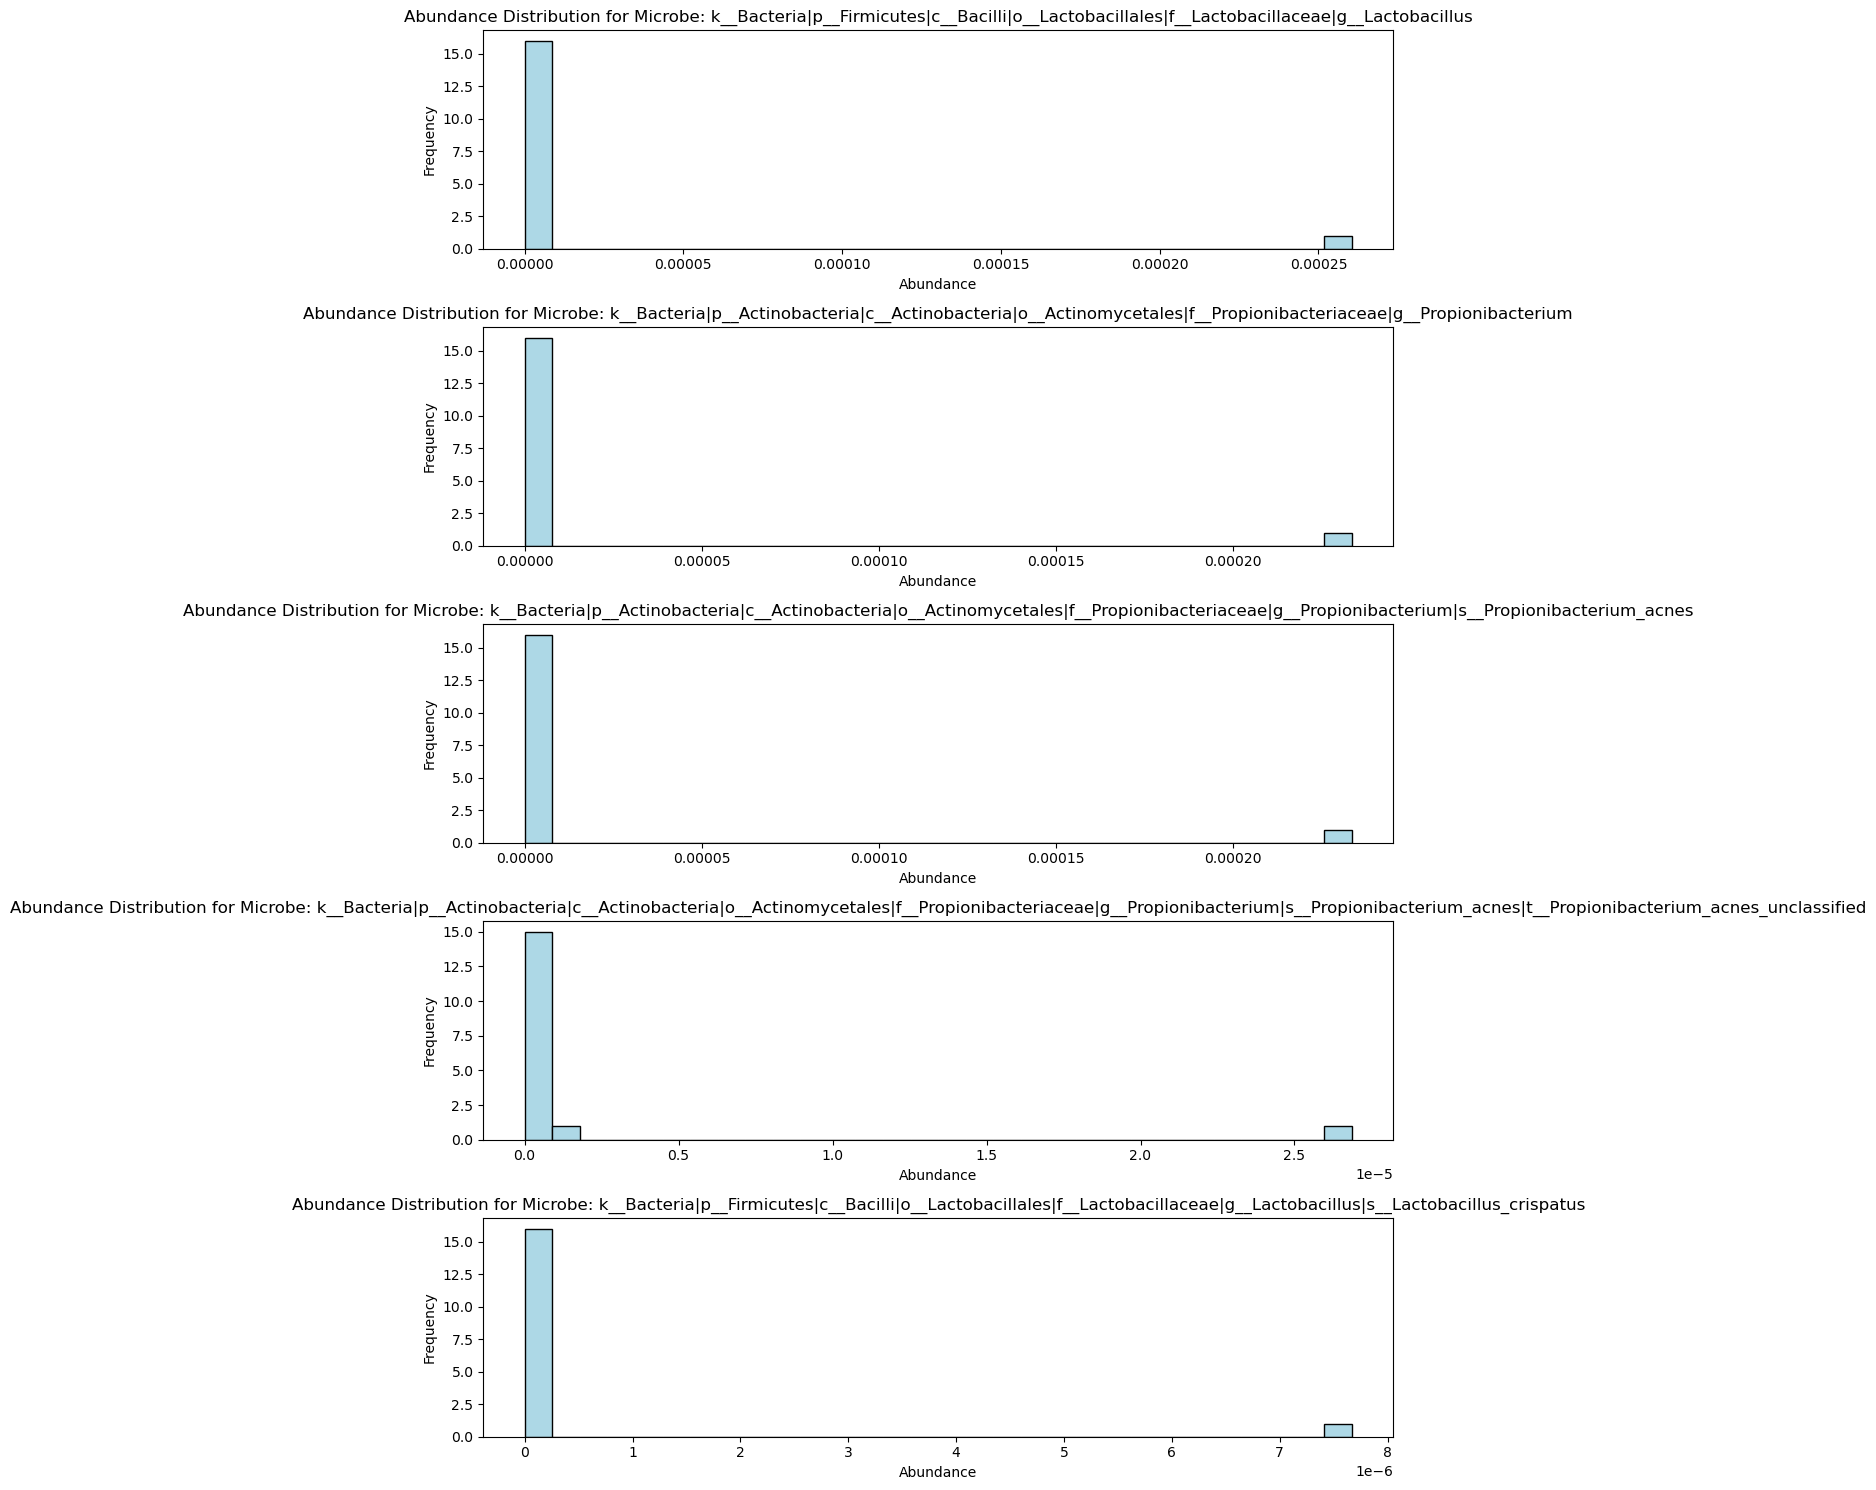

In [14]:
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (10,15))

for idx, (microbe, row) in enumerate(top_microbes.iterrows()):
    axes[idx].hist(abundance_cleaned.loc[idx], bins=30, color='lightblue', edgecolor='black')
    axes[idx].set_title(f'Abundance Distribution for Microbe: {row["Microbe"]}')
    axes[idx].set_xlabel('Abundance')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


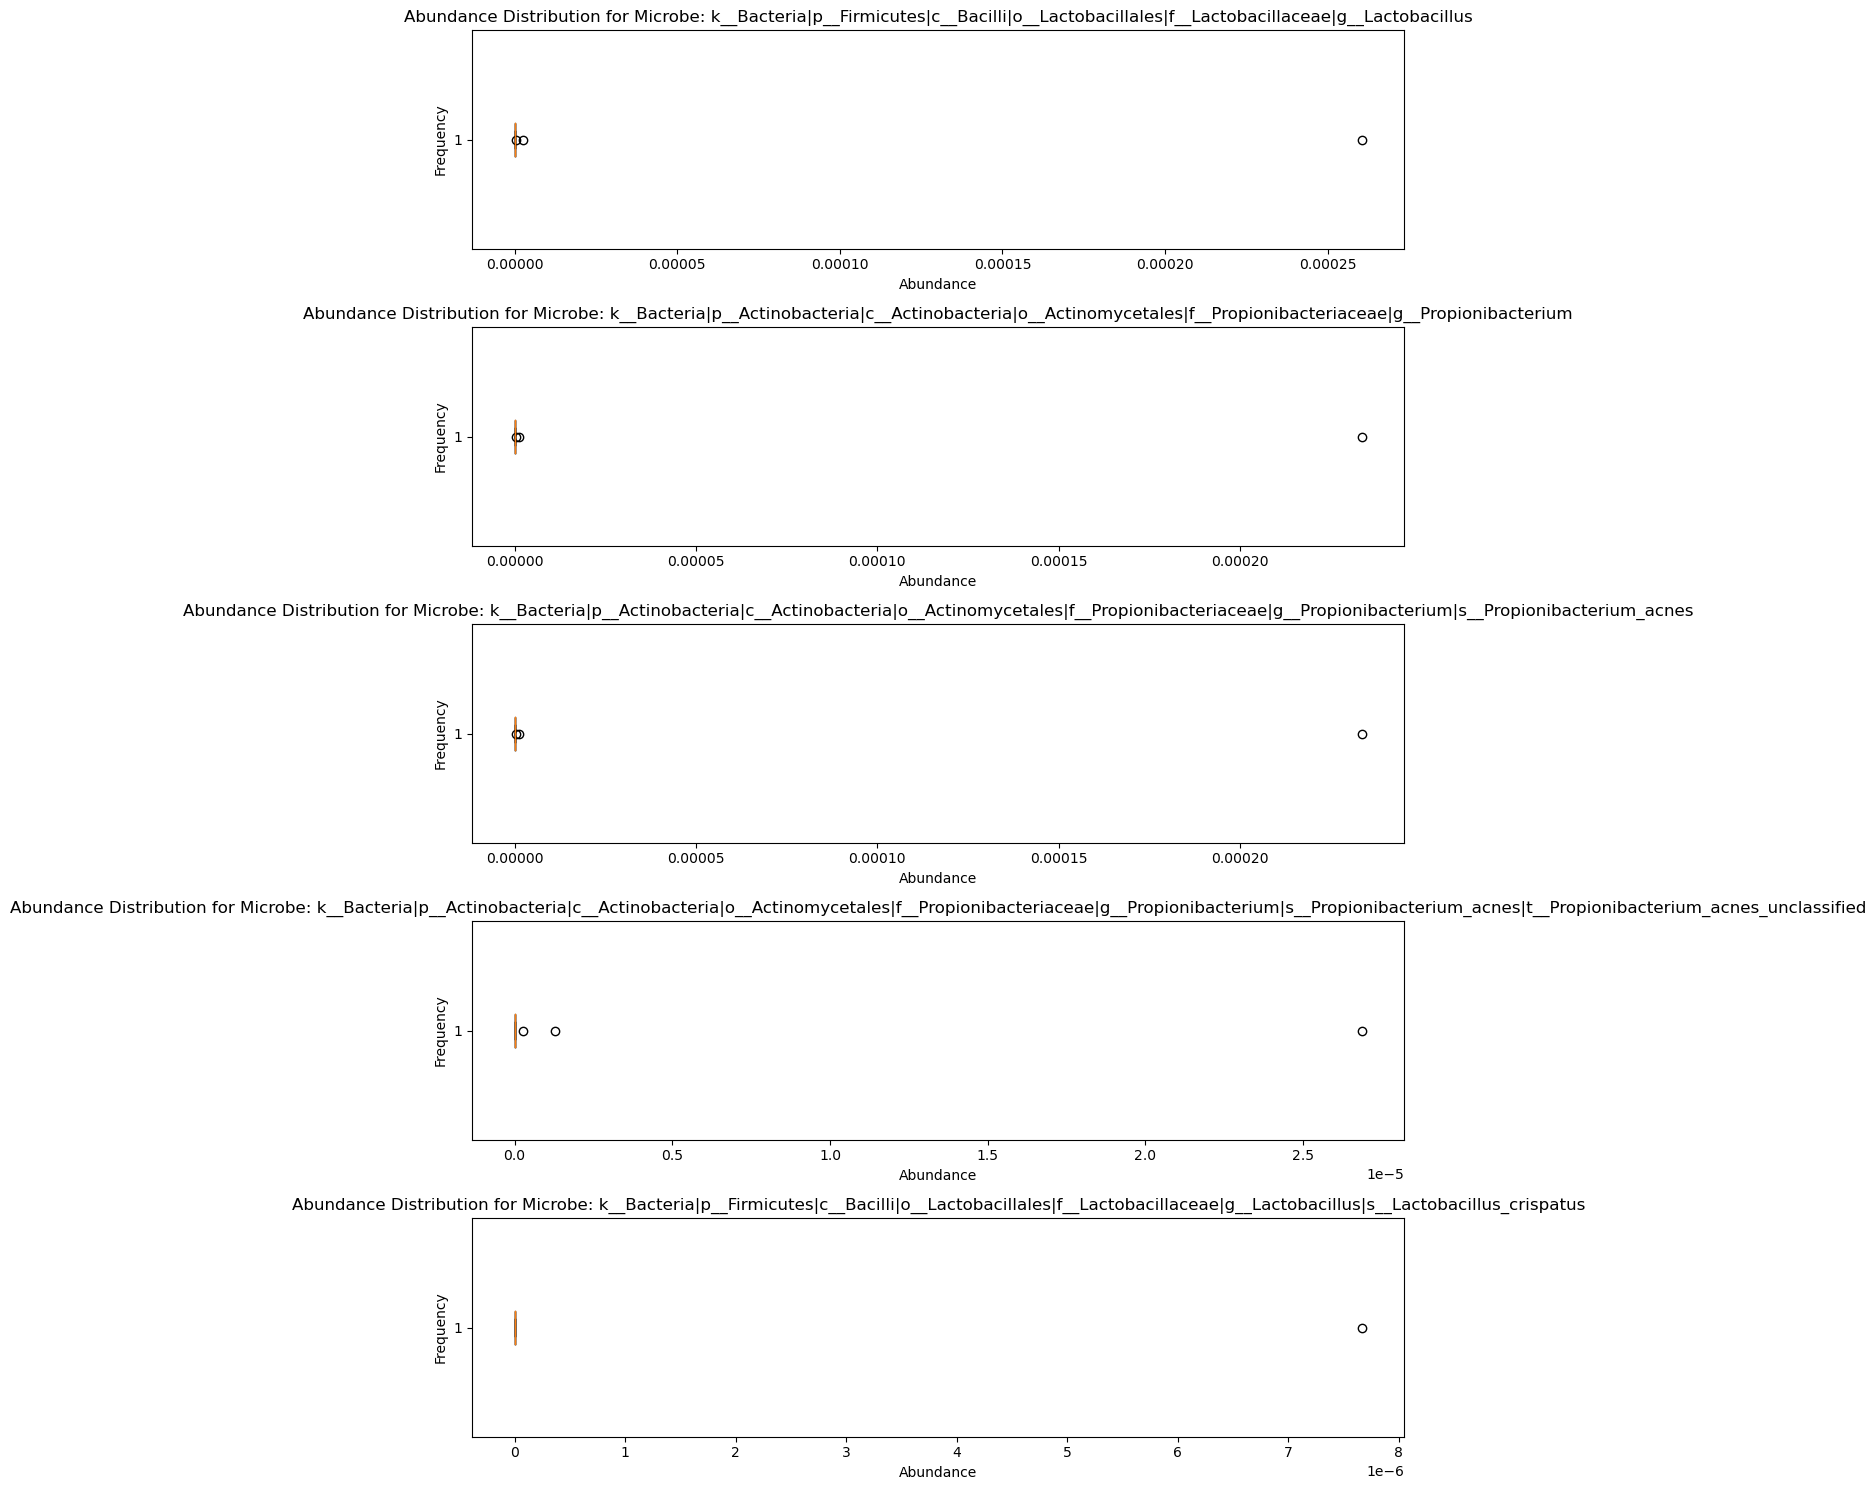

In [16]:
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (10,15))

for idx, (microbe, row) in enumerate(top_microbes.iterrows()):
    axes[idx].boxplot(abundance_cleaned.loc[idx].values, vert = False)
    axes[idx].set_title(f'Abundance Distribution for Microbe: {row["Microbe"]}')
    axes[idx].set_xlabel('Abundance')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Let's now take a look at alpha and beta diversity within the sample. 
Alpha diversity is the diversity within individual samples

In [18]:
import numpy as np 

#calculate richness for each body site

richness = abundance_cleaned.apply(lambda x: len(x[x > 0]))

#shannon diversity
shannon_diversity = -abundance_cleaned.apply(lambda x: np.sum(x * np.log(x + np.finfo(float).eps)), axis = 0)

#simpson diversity

simpson_diversity = abundance_cleaned.apply(lambda x: 1/np.sum(x**2), axis = 0)

alpha_diversity = pd.DataFrame({
    "Richness":richness, 
    "Shannon Diversity":shannon_diversity, 
    "Simpson Diversity":simpson_diversity
})

alpha_diversity

,Richness,Shannon Diversity,Simpson Diversity
anterior_nares,896,7.219681,2.127128
buccal_mucosa,1004,9.324205,3.872804
hard_palate,249,7.751849,2.861798
keratinized_gingiva,552,8.867365,3.658278
l_retroauricular_crease,715,3.460393,0.646944
mid_vagina,442,4.451502,0.714402
palatine_tonsils,633,10.406163,6.924576
posterior_fornix,834,5.047258,0.850944
r_antecubital_fossa,223,7.610032,3.292361
r_retroauricular_crease,694,4.182150,0.756920


Richness is the unique number of microbial taxa present in each site. <br>

Shannon diversity greater value indicates greater diversity and considers taxa and abundances <br>

Simpson diversity considers both values but weighs abundant taxa more.

Next we will do Prinicpal coordinate analysis on the bray curtis matrix, which measures beta diversity for our abundance data. We can represent the pairwise dissimilarities using a lower dimensional format. <br>

Bray Curtis Dissimilarity quantifies dissimilarity between two different sites or samples on counts. We use a scaler so that we can calculate the dissimilarities. 

In [22]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS 
from sklearn.preprocessing import StandardScaler

t_abundance = abundance_cleaned.transpose() 

scaler = StandardScaler() 
scaled_abundance = scaler.fit_transform(t_abundance)

#calculate bray-curtis disimilarity 

bray_curtis_matrix = pairwise_distances(scaled_abundance, metric = 'braycurtis')

#apply pcoa on bray curtis matrix 

mds = MDS(n_components = 2, dissimilarity = 'precomputed', random_state = 42)
pcoa_coords = mds.fit_transform(bray_curtis_matrix)

pcoa_df = pd.DataFrame(pcoa_coords, columns = ['PCoA1', 'PCoA2'], index = abundance_cleaned.columns)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/alanwu/Documents/GitHub/Microbiome-Data-Processing/.conda/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


We will plot the beta diversities across sites

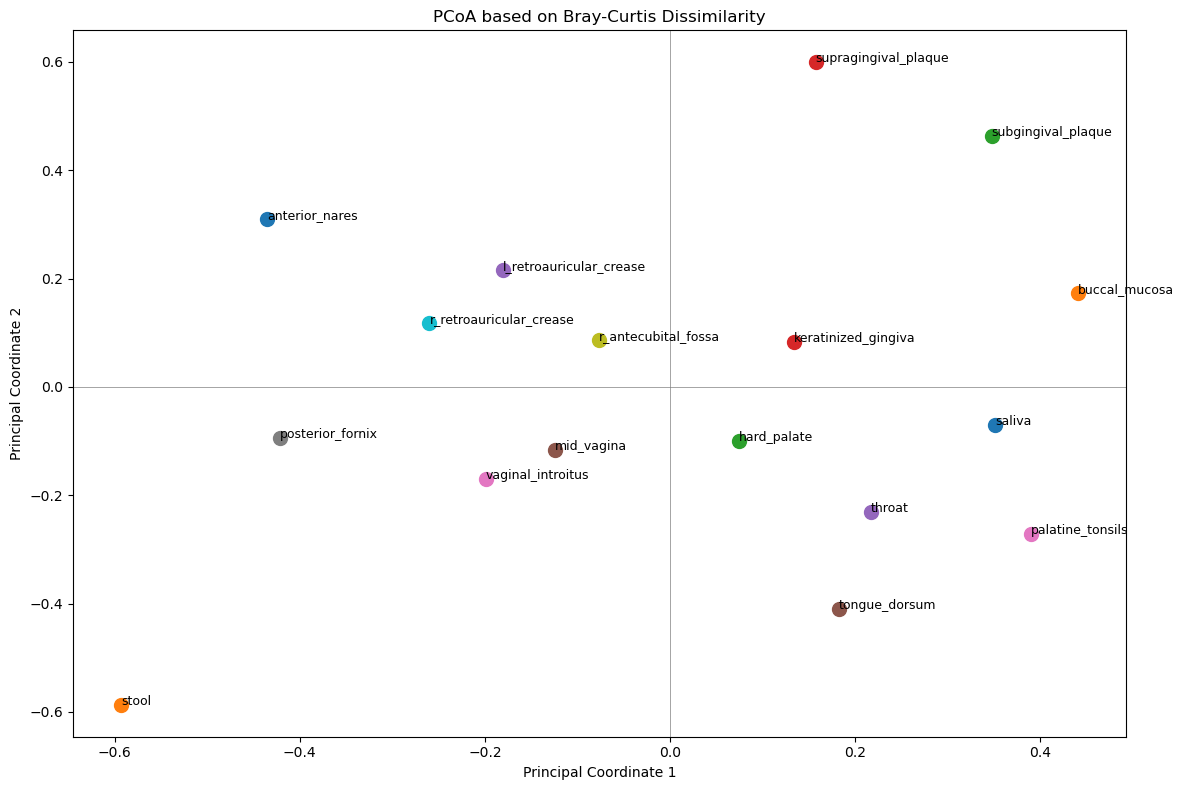

In [23]:
plt.figure(figsize = (12,8))

for idx, row in pcoa_df.iterrows(): 
    plt.scatter(row['PCoA1'], row['PCoA2'], label=idx, s=100)
    plt.text(row['PCoA1'], row['PCoA2'], idx, fontsize=9)

plt.xlabel('Principal Coordinate 1')
plt.ylabel('Principal Coordinate 2')
plt.title('PCoA based on Bray-Curtis Dissimilarity')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.tight_layout()
plt.show()


Body Sites that are closer together may indicate microbial communities that are more similar. It is evident that stool is seaprate from everything else, while the vaginal communities are similar, which is to be expected. 

Now we want to look at the clustering of the different microbes across the sites

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


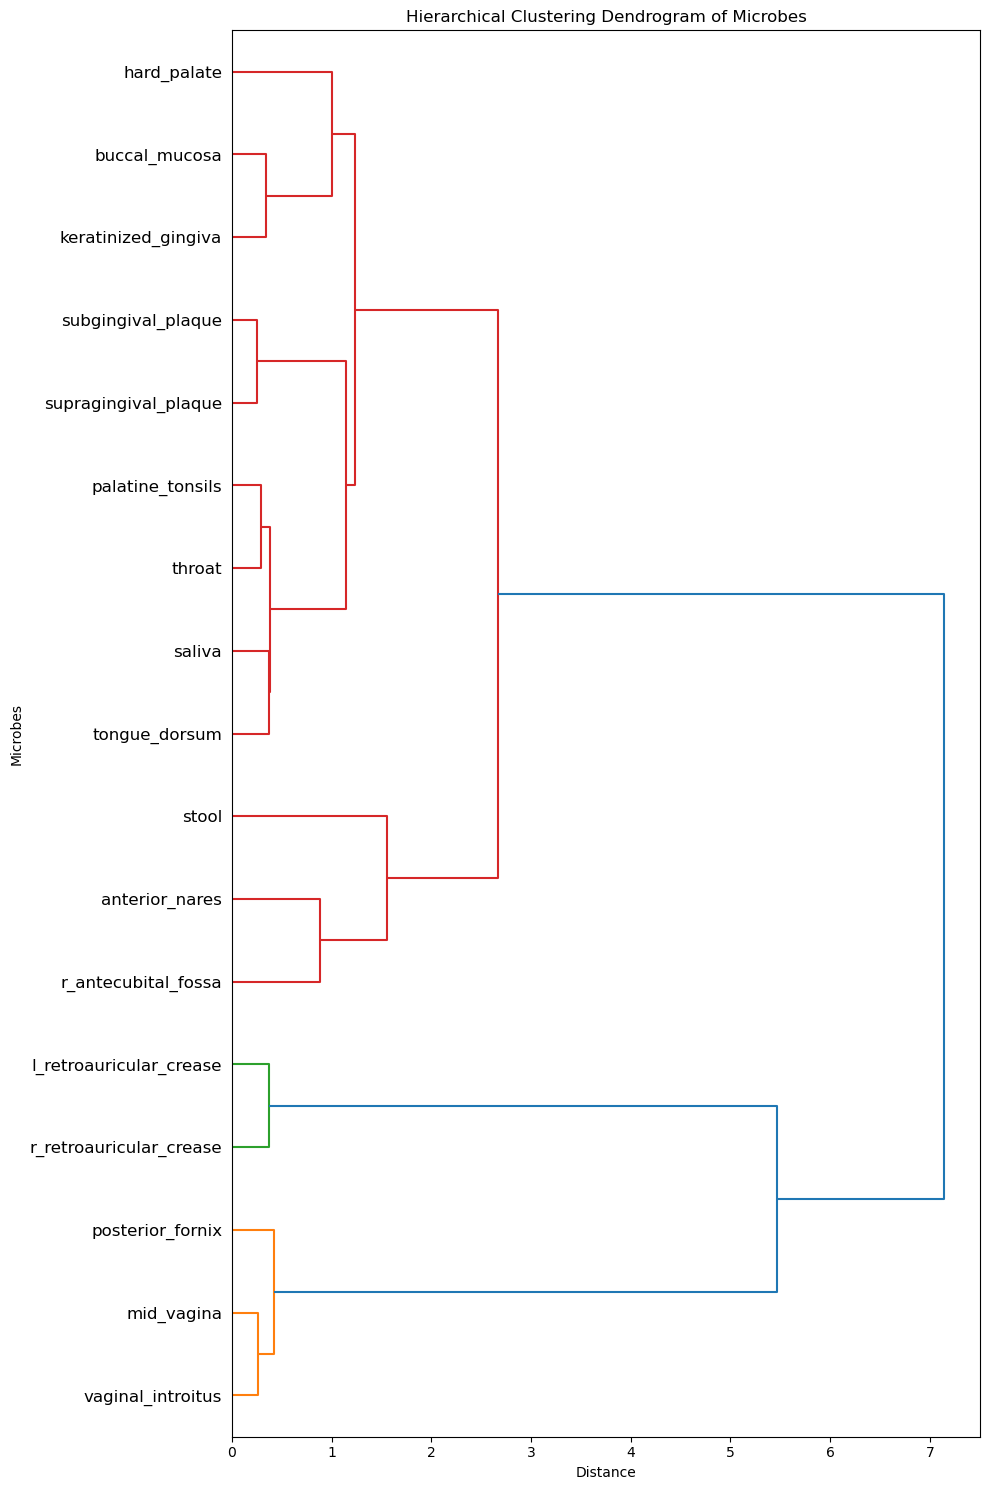

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns 

data_cleaned = abundance_cleaned.T

distance_matrix = pairwise_distances(data_cleaned, metric = 'euclidean')

linked = linkage(distance_matrix, method = 'ward')


plt.figure(figsize=(10, 15))
dendrogram(linked, orientation='right', labels=data_cleaned.index, distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram of Microbes')
plt.xlabel('Distance')
plt.ylabel('Microbes')
plt.tight_layout()
plt.show()


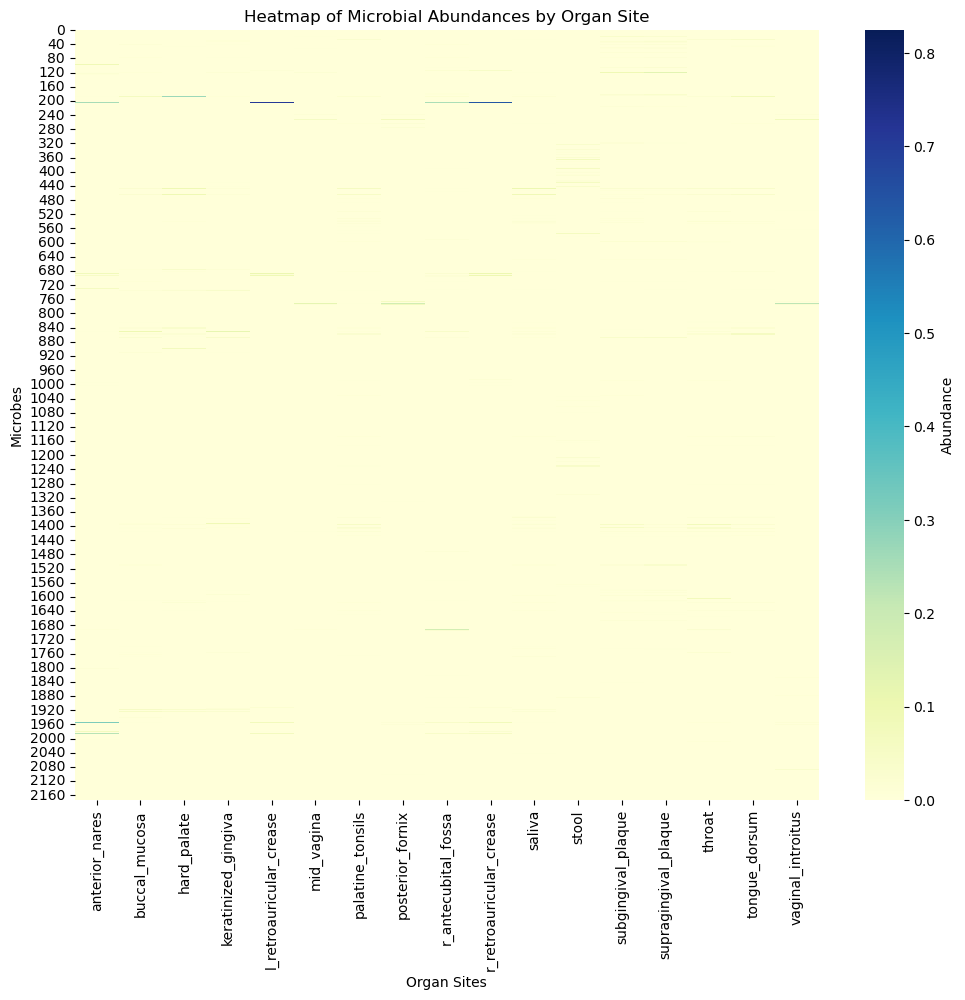

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

#plotting the log 
logabundance = np.log1p(abundance_cleaned)

# Set the size for the heatmap
plt.figure(figsize=(12, 10))

# Display the heatmap
sns.heatmap(logabundance, cmap="YlGnBu", cbar_kws={'label': 'Abundance'})

plt.title('Heatmap of Microbial Abundances by Organ Site')
plt.xlabel('Organ Sites')
plt.ylabel('Microbes')
plt.show()


Perform NMF on the matrices so we can isolate k-signatures from the data. 

In [33]:
from sklearn.decomposition import NMF


sample_k = 2 

model = NMF(n_components = sample_k, init = 'random', random_state = 42)

W = model.fit_transform(abundance_cleaned)
H = model.components_


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [34]:
H

array([[6.79867795e-04, 5.47915121e-04, 4.95707426e-04, 7.83266399e-04,
        0.00000000e+00, 9.44168441e-02, 8.42421464e-04, 8.64851194e-02,
        3.63839058e-03, 0.00000000e+00, 5.37167958e-04, 2.41168149e-04,
        5.00349887e-04, 5.78586385e-04, 4.33081929e-04, 5.10320345e-04,
        9.19817289e-02],
       [1.14223674e-01, 4.58980179e-03, 3.12678946e-03, 3.64384353e-03,
        2.63392658e-01, 2.55024443e-04, 2.08038942e-03, 6.99668483e-04,
        9.73163484e-02, 2.43517463e-01, 2.73637284e-03, 6.57713593e-04,
        4.61150012e-03, 5.15001598e-03, 2.48187712e-03, 2.80100718e-03,
        0.00000000e+00]])

In [36]:
W

array([[2.41559359e-06, 5.80131460e-06],
       [2.20309441e-06, 3.22607949e-06],
       [2.20309441e-06, 3.22607949e-06],
       ...,
       [0.00000000e+00, 4.51525511e-05],
       [3.80740451e-06, 1.71102642e-06],
       [3.80740451e-06, 1.71102642e-06]])